NAME = "Xudong Guo"
Purpose:
This visualization is used to answer question 3: Do frequency of use, number of strokes, and grade levels have some relationships with the Wanikani levels?

Input:
cleaned_link.csv 


In [4]:
import pandas as pd
import ast
import math
import matplotlib.pylab as plt
import numpy as np

In [5]:
#word_table = pd.read_csv('wikiword_table.csv')
kanji_table = pd.read_csv("../Question1/cleaned_link.csv")

In [6]:
#word_table
kanji_table

,kanji,strokes,frequency,grade,jlpt,parts,radicals,on_readings,kun_readings,on_readings_compounds,...,Number of Appearances on Wikipedia,Percentage of Appearances on Wikipedia,Rank of Appearances on Wikipedia,Number of Appearances on News,Percentage of Appearances on News,Rank of Appearances on News,Number of Appearances on Aozora,Percentage of Appearances on Aozora,Rank of Appearances on Aozora,main_meaning
0,亜,7.0,1509.0,junior high,N1,"['一', '｜', '口']",{'二': 'two'},['ア'],['つ.ぐ'],"['亜 【ア】 sub-, -ous (indicating a low oxidati...",...,172858.0,0.000220,836.0,689.0,0.000067,1306.0,3506.0,0.000068,1710.0,"['Asia', 'rank next', 'come after', '-ous']"
1,哀,9.0,1715.0,junior high,N1,"['亠', '口', '衣']","{'口': 'mouth, opening'}",['アイ'],"['あわ.れ', 'あわ.れむ', 'かな.しい']","['哀悼 【アイトウ】 condolence, regret, tribute, sor...",...,19390.0,0.000025,1884.0,167.0,0.000016,1842.0,10141.0,0.000197,971.0,"['pathetic', 'grief', 'sorrow', 'pathos', 'pit..."
2,挨,10.0,2258.0,junior high,NaN,"['厶', '扎', '矢', '乞']",{'手 (扌龵)': 'hand'},['アイ'],['ひら.く'],"['挨拶 【アイサツ】 greeting, greetings, salutation,...",...,12111.0,0.000015,2138.0,13.0,0.000001,2634.0,6784.0,0.000132,1249.0,"['approach', 'draw near', 'push open']"
3,愛,13.0,640.0,grade 4,N3,"['冖', '夂', '心', '爪']","{'心 (忄, ⺗)': 'heart'}",['アイ'],"['いと.しい', 'かな.しい', 'め.でる', 'お.しむ', 'まな']","['愛 【アイ】 love, affection, care, attachment, ...",...,754387.0,0.000962,269.0,5340.0,0.000518,503.0,54392.0,0.001057,213.0,"['love', 'affection', 'favourite']"
4,曖,17.0,NaN,junior high,NaN,"['冖', '夂', '心', '日', '爪']","{'日': 'sun, day'}",['アイ'],['くら.い'],"['曖昧 【アイマイ】 vague, ambiguous, unclear, fuzzy...",...,116055.0,0.000148,1025.0,30.0,0.000003,2371.0,1001.0,0.000019,2661.0,"['dark', 'not clear']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,脇,10.0,1806.0,junior high,NaN,"['力', '月']",{'肉 (⺼)': 'meat'},['キョウ'],"['わき', 'わけ']",['脇侍 【ワキジ】 flanking image (e.g. in a Buddha ...,...,56893.0,0.000073,1355.0,1092.0,0.000106,1118.0,4018.0,0.000078,1610.0,"['armpit', 'the other way', 'another place', '..."
2132,惑,12.0,777.0,junior high,N1,"['口', '心', '戈']","{'心 (忄, ⺗)': 'heart'}",['ワク'],['まど.う'],"['惑星 【ワクセイ】 planet', '惑星科学 【ワクセイカガク】 plane...",...,176943.0,0.000226,817.0,1624.0,0.000157,964.0,10425.0,0.000203,949.0,"['beguile', 'delusion', 'perplexity']"
2133,枠,8.0,922.0,junior high,N1,"['十', '九', '木']",{'木': 'tree'},NaN,['わく'],"['枠 【わく】 frame, framework, border, box, limi...",...,191596.0,0.000244,786.0,1460.0,0.000141,1010.0,904.0,0.000018,2738.0,"['frame', 'framework', 'spindle', 'spool', 'bo..."
2134,湾,12.0,545.0,junior high,N2,"['亠', '弓', '汁']","{'水 (氵, 氺)': 'water'}",['ワン'],['いりえ'],"['湾 【ワン】 bay, gulf, inlet', '湾岸 【ワンガン】 gul...",...,187927.0,0.000240,791.0,2388.0,0.000231,804.0,1832.0,0.000036,2198.0,"['gulf', 'bay', 'inlet']"


In [7]:
row = kanji_table['radicals'][0]
list(ast.literal_eval(row).keys())

['二']

In [8]:
# Wanikani Level Viz Get Data
kanjis = kanji_table['kanji']
levels = kanji_table['wanikani_level']
levels = levels.unique()
count = {}
for i in range(0,len(kanjis)):
    l = kanji_table.iloc[i]['wanikani_level']
    if math.isnan(l):
        continue
    if l in count:
        count[l] = count[l] + 1
    else:
        count[l] = 1


# Number of Kanji in Each Wanikani Level 

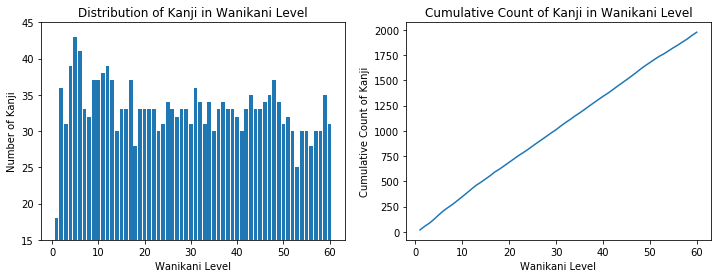

In [9]:
lists = sorted(count.items())
x, y = zip(*lists)

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Distribution of Kanji in Wanikani Level")
ax1.set_xlabel("Wanikani Level")
ax1.set_ylabel("Number of Kanji")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Cumulative Count of Kanji in Wanikani Level")
ax2.set_xlabel("Wanikani Level")
ax2.set_ylabel("Cumulative Count of Kanji")
ax1.bar(x,y)
ax1.set_ylim(15, 45)
ax2.plot(x,np.array(y).cumsum())

## Conclusion
Wanikani distributed kanjis in a quite uniform way. Each level contains approximately 45 kanjis. We could see in the cumulative curve, the 'pace' is quite smooth.

In [102]:
container2 = []

grade_char_count = []

for gradenum in np.arange(len(x)):

    raw_in_gradenum = kanji_table[kanji_table["wanikani_level"] == x[gradenum]]

    grade_char_count.append(raw_in_gradenum["frequency"].count())
    
    #raw_grade_freq_avr = np.mean(raw_in_gradenum["frequency"])
    
    #container2[gradenum] = raw_grade_freq_avr
    container2.append(list(raw_in_gradenum['frequency'].dropna()))
    


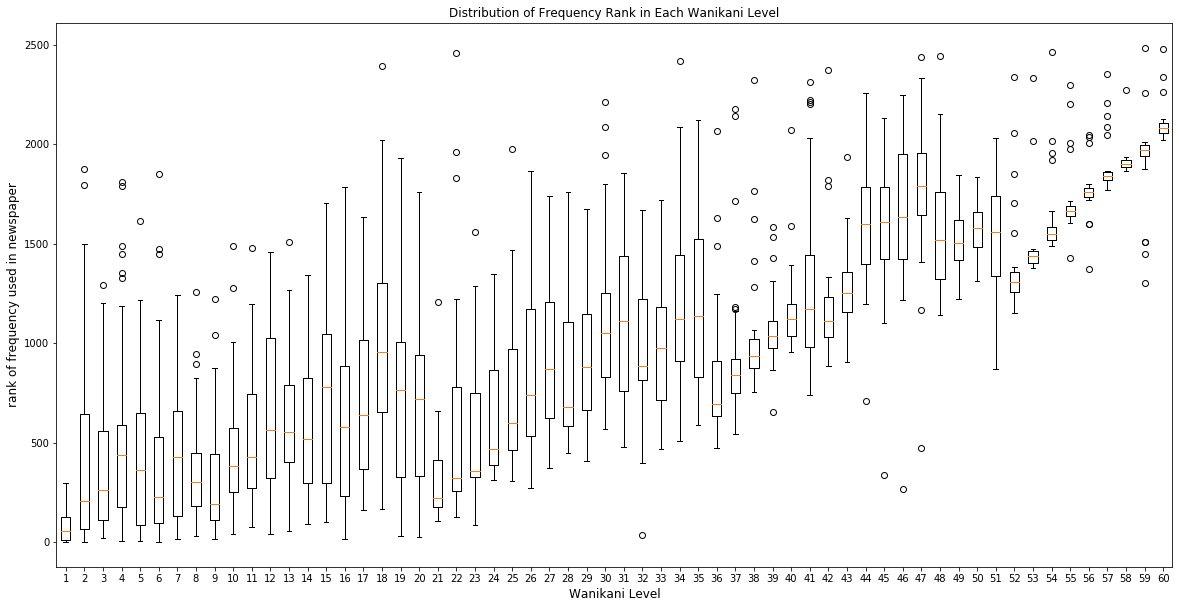

In [103]:
fig2 = plt.figure(figsize=(20,10))
axis21 = fig2.add_subplot(1,1,1)
#axis21.bar(np.arange(len(grades)),container2, alpha=0.5, color="green")
axis21.boxplot(container2)
#axis21.plot(np.array(grade_char_count).cumsum(),color="green")
axis21.set_title("Distribution of Frequency Rank in Each Wanikani Level", fontsize="large")
axis21.set_xlabel("Wanikani Level", fontsize="large")
axis21.set_ylabel("rank of frequency used in newspaper", fontsize="large")

xticks21 = []
for i in np.arange(len(x)):
    xticks21.append("{}".format(int(x[i])))
    
#axis21.set_xticks(np.arange(len(x)))
axis21.set_xticklabels(xticks21)
print("")

## Conclusion
Wanikani tends to introduce the most frequently used kanjis first. The box plot shows Q1 and Q3 boxes are at the bottom (meaning these kanjis are more frequently used) for lower level kanjis. As the kanjis' level goes higher, their frequency of use is becoming less.

In [104]:
container3 = []

stroke_char_count = []

for gradenum in np.arange(len(x)):

    raw_in_gradenum = kanji_table[kanji_table["wanikani_level"] == x[gradenum]]

    stroke_char_count.append(raw_in_gradenum["strokes"].count())

    container3.append(list(raw_in_gradenum['strokes'].dropna()))
    

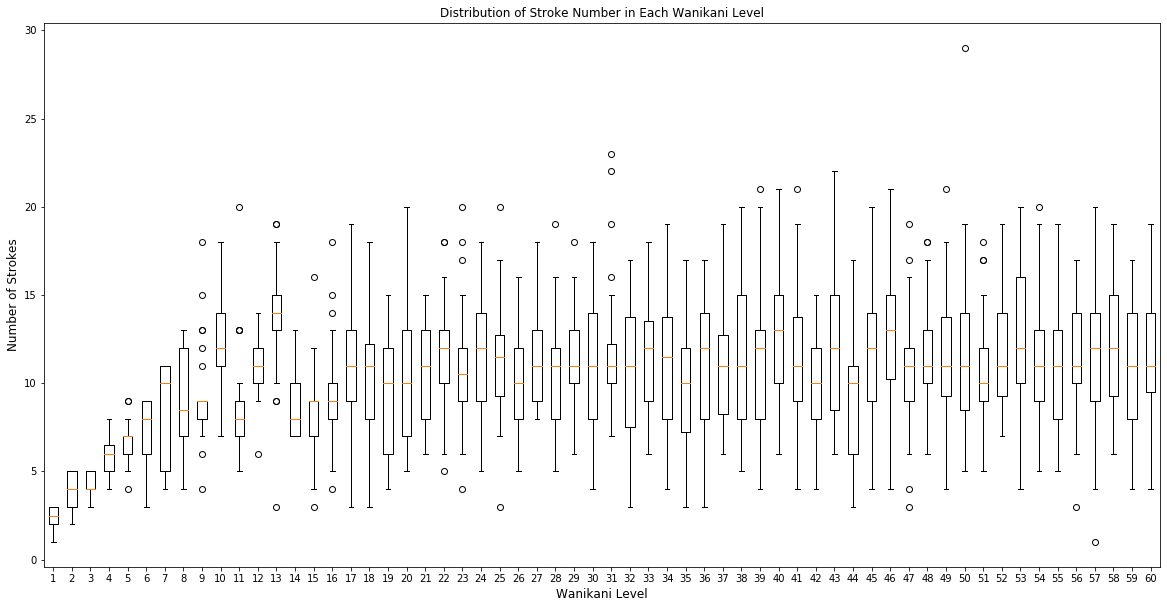

In [105]:
fig3 = plt.figure(figsize=(20,10))
axis3 = fig3.add_subplot(1,1,1)
#axis21.bar(np.arange(len(grades)),container2, alpha=0.5, color="green")
axis3.boxplot(container3)
#axis21.plot(np.array(grade_char_count).cumsum(),color="green")
axis3.set_title("Distribution of Stroke Number in Each Wanikani Level", fontsize="large")
axis3.set_xlabel("Wanikani Level", fontsize="large")
axis3.set_ylabel("Number of Strokes", fontsize="large")

xticks3 = []
for i in np.arange(len(x)):
    xticks3.append("{}".format(int(x[i])))
    
#axis21.set_xticks(np.arange(len(x)))
axis3.set_xticklabels(xticks3)
print("")

## Conclusion
Although in the first 10-ish levels, the number of strokes of those kanjis are less, it doesn't have much difference for the latter levels. So, after level 10, the number of strokes may not be a categorizing standard.

In [108]:
level = kanji_table['wanikani_level']
grade = kanji_table['grade']
newtable = pd.DataFrame([level,grade])
fig4 = plt.figure()
newtable = newtable.transpose()
newtable = newtable.dropna()
#axis4 = fig4.add_subplot(1,1,1)
newtable = newtable.sort_values(by = ['grade'], ascending = False)
#axis4.scatter(newtable['wanikani_level'], newtable['grade'])
#axis4.set_yticks(['grade 1', 'grade 2', 'grade 3', 'grade 4', 'grade 5', 'grade 6', 'junior high'])



<Figure size 432x288 with 0 Axes>

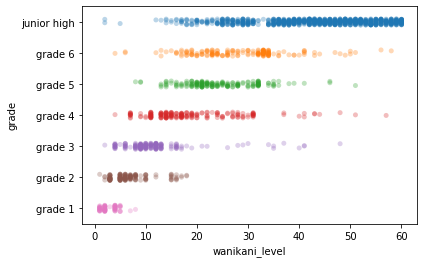

In [107]:
import seaborn as sns
sns.stripplot(x='wanikani_level', y='grade', data=newtable, jitter=True, edgecolor = 'none', alpha = 0.3)

## Conclusion
This plot shows WaniKani tends to use the similar sets as the categorization made by Japanese Ministry of Education. Lower WaniKani level kanjis are taught in grade 1 or 2, while the higher level ones mostly taught in junior high. They have somewhat a correlation.